In [1]:
#Phase 1 : Analysis of data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
data=pd.read_csv("Train.csv")
data.head(20)

#m=data.describe() #- This tells us exactly how many NANS we have in our dataset for each column
#m[:1]["Credit_History"] 

#data['Property_Area'].value_counts() - Counts variables by group
#data['ApplicantIncome'].hist(bins=50) - We can infer the range of incomes and also see outliers, these outliers may be due to..
#plot.show()

#data.boxplot(column='ApplicantIncome', by = 'Education') - ... educational diffrences which we compare here 
#Inference: There are higher no. of graduates with very high incomes and not too many high incomes from non-graduates
#plot.show()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


The probability that if your credit score is 1 your loan status becomes Y : 
79.57894736842105
The probability that if your credit score is 0 your loan status becomes Y : 
7.865168539325842


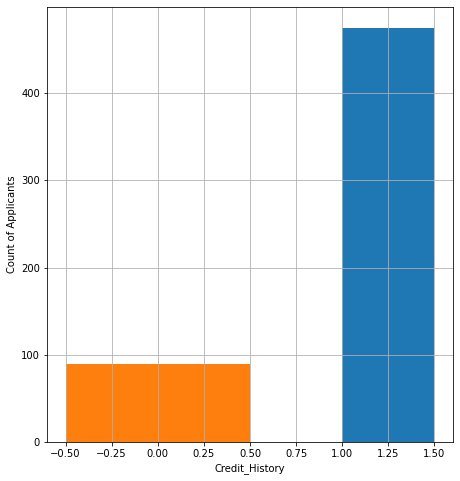

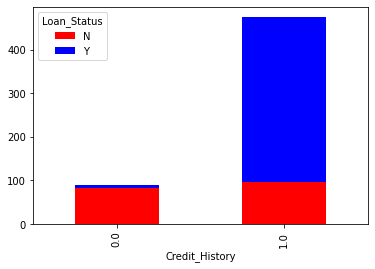

In [2]:
#Phase 2 :Categorical Variable Analysis

#temp2 stores rows of data who's credit scores =1 
temp2=data[data["Credit_History"]==1 ]
#(the final) temp2 stores columns credit history and loan status of data whos credit scores are one
temp2=temp2[["Credit_History","Loan_Status"]]
#temp1 stores columns credit history and loan status of data whos credit scores are one and loan status is "Y"
temp1=temp2[temp2["Loan_Status"]=="Y"]
print("The probability that if your credit score is 1 your loan status becomes Y : ")
probcredscore1=(len(temp1)/len(temp2))*100
print(probcredscore1)

#Similarly we analise for credit score 0
temp3=data[data["Credit_History"]==0]
temp3=temp3[["Credit_History","Loan_Status"]]
temp4=temp3[temp3["Loan_Status"]=="Y"]
print("The probability that if your credit score is 0 your loan status becomes Y : ")
probcredscore2=(len(temp4)/len(temp3))*100
print(probcredscore2)

#Visual Graphs
import matplotlib.patches as mpatches
fig = plot.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
temp2["Credit_History"].hist(bins=2)
temp3["Credit_History"].hist(bins=1)
plot.show()
#combined Visual Graph
temp5 = pd.crosstab(data['Credit_History'],data['Loan_Status'])
temp5.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
plot.show()



In [3]:
#Phase 3 : Clean Up data
def clean_data(data): # - We need to do this entire method for test data as well so this function can be pretty usefull 
    #data.apply(lambda x: sum(x.isnull()))#-checks missing / NAN values
    data["LoanAmount"].fillna(data["LoanAmount"].mean(),inplace=True)
    #data.apply(lambda x: sum(x.isnull()))

    #data.boxplot(column='LoanAmount', by = ['Education','Self_Employed'] )
    #plot.show()
    data['Self_Employed'].value_counts()#-Most values are "no" so we replace all the NA/Missing values with "no"
    data['Self_Employed'].fillna("no",inplace=True)
    #data.apply(lambda x: sum(x.isnull()))

 
    data["CoapplicantIncome"]=data["CoapplicantIncome"].astype(float)
    data['Total_Income']=data['ApplicantIncome']+data['CoapplicantIncome']#-combining 2 features into 1 feature
    data["Total_Income"]=data["Total_Income"].astype(float)
    #np.log(data['Total_Income']).hist(bins=20)
    #data.apply(lambda x: sum(x.isnull()))

    malecount=data[data["Gender"]=="Male"]["Gender"].count()
    femalecount=data[data["Gender"]=="Female"]["Gender"].count()
    totalcount=data["Gender"].count()
    male_ratio=malecount/totalcount
    female_ratio=femalecount/totalcount
    #print("Male %",male_ratio*100)
    #print("Female %", female_ratio*100) 100 7 , 100 : 7 
    #gendernan=13 male_ratio*gendernan = no. of people who's data will be entered as male vice versa for females
    #print("Male nans:",13*male_ratio) -there are about 10 male and 3 female nans
    data["Gender"].fillna("Male",limit=10,inplace=True)
    data["Gender"].fillna("Female",limit=3,inplace=True)
    #data.apply(lambda x: sum(x.isnull()))

    marriednanset=data[data["Married"].isnull()]  #-All of the people who did not fill out wether they are married or not
    datafix=np.array(marriednanset["CoapplicantIncome"])  
    for i in range(len(datafix)):
        if datafix[i]!=0: #- If coapplicant income is not 0 it means that they are most likely married 
            marriednanset.fillna("Yes",limit=1,inplace=True)
        else:
            marriednanset.fillna("No",limit=1,inplace=True)
    data[data["Married"].isnull()]=marriednanset #- copying the changed values back into the original data
    #data.apply(lambda x: sum(x.isnull()))

    data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(),inplace=True) #-It's unpredictable of how long a person will take a loan and hence 
    #data.apply(lambda x:sum(x.isnull())) #                                                                                      we fill na with mean

    data["Dependents"].fillna(0,inplace=True)#-Unpredictable , so by default we set dependencies to a person as 0
    #data.apply(lambda x:sum(x.isnull()))

    data["Credit_History"].fillna(1,inplace=True) #-By default we assume everyone has a credit history document
    data.apply(lambda x:sum(x.isnull()))
    
    return data
data=clean_data(data)
data.apply(lambda x:sum(x.isnull()))

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

In [4]:
#Phase 4: Preprocessing data
from sklearn.preprocessing import LabelEncoder
def preprocess_data(data):
    var_mod = ['Gender','Married','Education','Self_Employed','Property_Area']
    if "Loan_Status" in data:
        var_mod.append("Loan_Status")
    le = LabelEncoder()
    for feature in var_mod: #-label encoder converts string into int ... for example gender= m and gender = f gets converted into gender=0 and gender=1
        data[feature] = le.fit_transform(data[feature])
    #we have to convert Dependents into the same format , however it contains strings such as 3+ so we can't use the label encoder
    counter=0
    notfour="3+"
    for feature in range(len(data["Dependents"])):
        if data["Dependents"][counter]==notfour:
            data["Dependents"][counter]=4
        elif data["Dependents"][counter]=="Yes" :
            data["Dependents"][counter]=1
        elif data["Dependents"][counter]=="No":
            data["Dependents"][counter]=0
        else:
            data["Dependents"][counter]=int(data["Dependents"][counter])
        counter=counter+1
    data["Dependents"] = le.fit_transform(data["Dependents"])
    return data
data=preprocess_data(data)
#data.dtypes  #-all data types shoudl be numeric except for loan id



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: Settin

In [55]:
#Phase 5 Start the ML Process : GENERIC FUNCTION FOR MAKING CLASSIFICATION MODEL AND DISPLAYING PERFORMANCE

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import metrics #- Provides accuracy scores
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def classification_model(model,data,predictors,outcome):
    model.fit(data[predictors],data[outcome])
    predictions=model.predict(data[predictors])
    accuracy=metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy=",(accuracy*100),"%")
    #For k fold cross verification
    kf = KFold(n_splits=5)#KFold returns the indices of 2 values : training set and test set
    error=[]
    for train, test in kf.split(data):
        train_predictors = (data[predictors].iloc[train,:]) #iloc chooses rows , in this case index train and all the columns
        train_target = data[outcome].iloc[train] # The target we choose to train the algorithm
        model.fit(train_predictors, train_target) 
        # predictions = model.predict(data[predictors].iloc[test,:])
        # print(confusion_matrix(data[outcome].iloc[test], predictions, labels=[0,1]))
        disp = plot_confusion_matrix(model, data[predictors].iloc[test,:], data[outcome].iloc[test],
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

 

#learn about iloc

In [64]:
#Choosing features
outcome="Loan_Status"
features= ["Gender","Married","Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Property_Area"]
#for choose in features:  #- with this we find out For feature: ['Credit_History'] , Accuracy= 80.94462540716613 % , Cross-Validation Score : 80.946% Hence we use this
 #   predictors.append(choose) # to fit our model
  #  print("For feature:",predictors)
   # classification_model(model,data,predictors,outcome)


In [91]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=5)
selector = selector.fit(X, y)
predictors = []
for feature,selected_bool in zip(features,selector.support_):
    if selected_bool == True:
        predictors.append(feature)
predictors.append("Credit_History")
predictors

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History']

Accuracy= 80.94462540716613 %
Cross-Validation Score : 80.946%


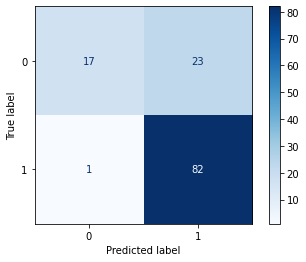

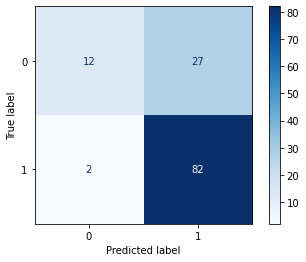

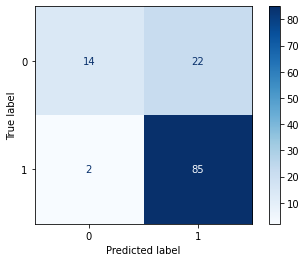

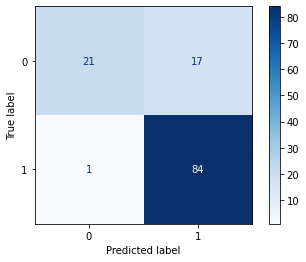

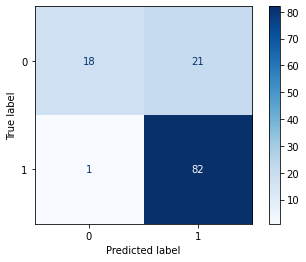

In [92]:
#Phase 6 : LOGISTIC REGRESSION
model=LogisticRegression()
classification_model(model,data,predictors,outcome)

Accuracy= 81.27035830618892 %
Cross-Validation Score : 79.807%


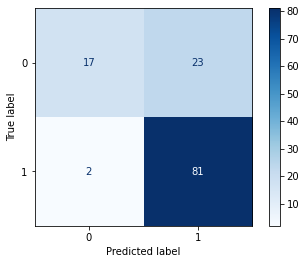

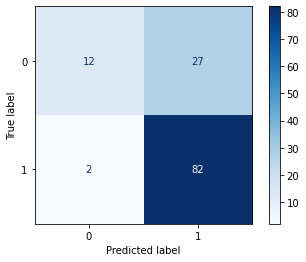

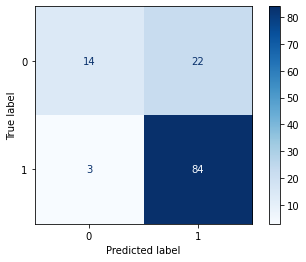

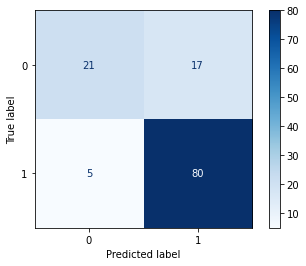

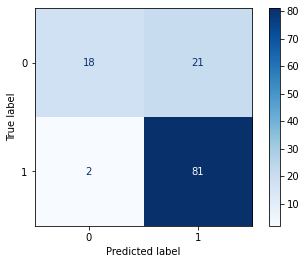

In [93]:
#Phase 7 : Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
classification_model(model,data,predictors,outcome)

Accuracy= 82.24755700325733 %
Cross-Validation Score : 78.830%


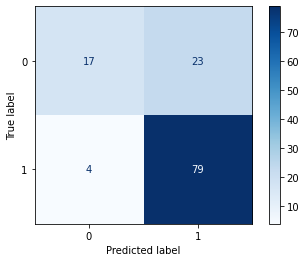

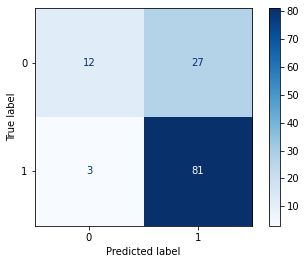

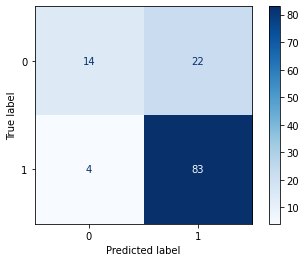

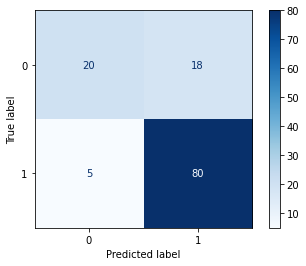

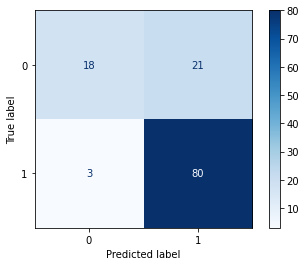

In [94]:
#Phase 8 : Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classification_model(model,data,predictors,outcome)

Accuracy= 80.94462540716613 %
Cross-Validation Score : 80.132%


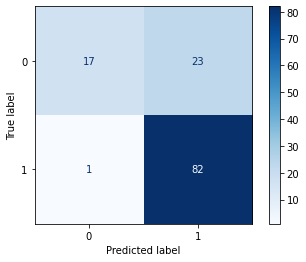

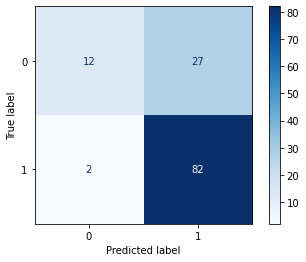

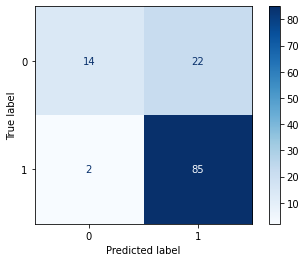

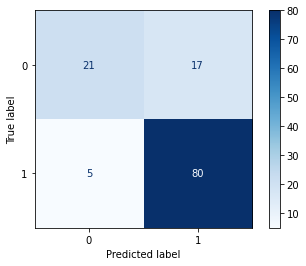

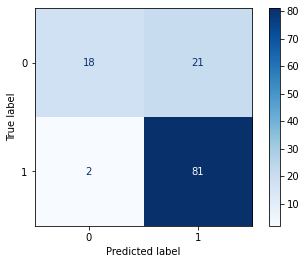

In [95]:
#Phase 9 : 
from xgboost import XGBClassifier

model = XGBClassifier()
classification_model(model,data,predictors,outcome)

In [74]:
#Phase 10 : Use test data and determine output
test_data=pd.read_csv("Test.csv")
test_data=preprocess_data(clean_data(test_data))
model.fit(data[predictors],data[outcome])
Y_rusty=model.predict(test_data[predictors])
Y=[]
for j in range(len(Y_rusty)) : # convert the 1s and 0s to Y and N 
    if Y_rusty[j]==1:
        Y.append("Y")
    else:
        Y.append("N")


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [75]:
#Phase 11: Store it into the CSV
df=pd.read_csv("Sample.csv")
df["Loan_Status"]=Y
df["Loan_ID"]=test_data["Loan_ID"]
df.to_csv("Results.csv")


In [76]:
#Phase 12: Check your score/percentage with the answers
answers=pd.read_csv("Answers.csv")
score=0
for j in range(len(answers["Loan_Status"])):
    if answers["Loan_Status"][j]==df["Loan_Status"][j]:
        score=score+1
print("Percent Correct :",(score/len(answers["Loan_Status"]))*100,"%") #- w00w :)


Percent Correct : 99.72752043596729 %
